In [2]:
import numpy as np
from matplotlib import pyplot as plt

## PKDgrav3 outputs

In [3]:
load = np.loadtxt('../../data/pkd_out/pkdgrav3_test.00100.pk')
k = load[:, 0]
pk = load[:, 1]
nk = load[:, 2]

In [4]:
data = np.loadtxt('../../data/pkd_out/pkdgrav3_test.01000.pk')
k_1000 = data[:, 0]
pk_1000 = data[:, 1]
nk_1000 = data[:, 2]

## Quijote reference

In [5]:
data = np.loadtxt('../../data/quijote/Pk/matter/fiducial/0/Pk_m_z=0.txt')
k_ref = data[:, 0]
pk_ref = data[:, 1]

In [6]:
k_1000.shape, k_ref.shape

((886,), (886,))

In [7]:
abs(k_1000 - k_ref[:len(k_1000)]).max()

4.992696887029524e-07

In [11]:
boxL = 1000
k_ref[0], k_ref[0]/(2*np.pi/boxL)

(0.008899641224696954, 1.4164218926549292)

In [12]:
np.sqrt(2)

1.4142135623730951

## Plot

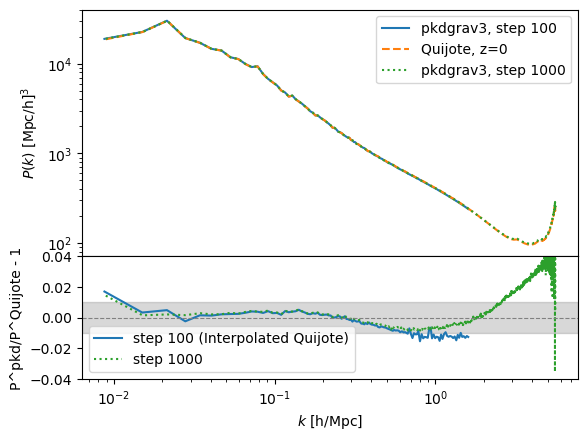

In [9]:

from scipy.interpolate import interp1d

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [2, 1]})

# 上图
ax1.plot(k, pk, label='pkdgrav3, step 100')
ax1.plot(k_ref, pk_ref, '--', label='Quijote, z=0')
ax1.plot(k_1000, pk_1000, ':', label='pkdgrav3, step 1000')
ax1.set_ylabel(r'$P(k)$ [Mpc/h]$^3$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()

# 下图
# Interpolate pk_ref to match k
interp_func = interp1d(k_ref, pk_ref, kind='linear', bounds_error=False, fill_value="extrapolate")
pk_ref_interp = interp_func(k)

# Plot the interpolated percent difference
percent_diff = pk  / pk_ref_interp - 1
ax2.plot(k, percent_diff, label='step 100 (Interpolated Quijote)')
percent_diff_1000 = pk_1000 / pk_ref[:len(pk_1000)] - 1
ax2.plot(k_1000, percent_diff_1000, ':', color='C2', label='step 1000')
ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.axhspan(-0.01, 0.01, color='gray', alpha=0.3)
ax2.set_ylim(-0.04, 0.04)
ax2.set_xlabel(r'$k$ [h/Mpc]')
ax2.set_ylabel('P^pkd/P^Quijote - 1')
ax2.set_xscale('log')
ax2.legend()


In [10]:
percent_diff_1000

array([ 1.41921516e-02,  1.41259751e-03,  2.00363872e-03,  1.53624080e-03,
        2.80242983e-03,  2.03620001e-03,  2.16375532e-03,  3.04609400e-03,
        2.55540978e-03,  3.64344903e-03,  4.29523580e-03,  3.80447208e-03,
        3.69401640e-03,  4.55062838e-03,  3.10458210e-03,  3.26831040e-03,
        2.10536004e-03,  4.37108698e-03,  3.75811270e-03,  3.86883261e-03,
        4.34097066e-03,  5.28125460e-03,  4.13259495e-03,  3.58414295e-03,
        2.65058757e-03,  2.44551174e-03,  3.09730272e-03,  2.96676235e-03,
        3.32824331e-03,  2.11241871e-03,  1.99138638e-03,  2.22867062e-03,
        2.41199680e-03,  2.00359085e-03,  1.83864012e-03,  3.12071495e-04,
        5.61112074e-04,  9.14102465e-04,  1.54220234e-03,  1.26911945e-03,
       -1.74888671e-04,  7.35423640e-04,  1.48032865e-03, -2.48756167e-04,
       -3.63385642e-04, -9.41031508e-04, -7.86931001e-04, -2.00475440e-03,
       -8.27705680e-04, -1.56678800e-03, -1.94522876e-03, -1.81889518e-03,
       -1.56600715e-03, -